In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from datetime import date
import datetime as dt

In [95]:
# Soltion 1.
claims=pd.read_csv("claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,33985796,75740424,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No
2,53522022,30308357,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes
3,13015401,47830476,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No
4,22890252,19269962,Crime,1/13/2018,Auto,No,Material only,"$2,680",1.0,No


In [96]:
cust_demo=pd.read_csv("cust_demographics.csv")
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,1-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [97]:
insurance_data=pd.merge(left=cust_demo,right=claims,left_on=["CUST_ID"],right_on=["customer_id"],how="right",indicator=True)
del insurance_data["customer_id"]
del insurance_data["_merge"]
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,"$2,980",1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/3/2018,Home,Unknown,Material only,"$2,980",3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,2/2/2018,Auto,No,Material only,"$3,369.50",1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,4/4/2018,Auto,No,Material only,"$1,950",6.0,No
4,47830476.0,Female,1-May-86,MA,413-187-7945,Silver,13015401,Natural causes,6/17/2018,Auto,No,Material only,"$1,680",1.0,No


In [98]:
# Solution 2.
insurance_data.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [99]:
#Solution 3
insurance_data["claim_amount"]=pd.to_numeric(insurance_data.claim_amount.str[1:].replace(',', '', regex=True))
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/3/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,2/2/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,4/4/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1-May-86,MA,413-187-7945,Silver,13015401,Natural causes,6/17/2018,Auto,No,Material only,1680.0,1.0,No


In [100]:
#Solution 4
injury_claim_data=insurance_data.copy()
injury_claim_data=injury_claim_data.loc[((injury_claim_data["claim_type"].str.contains("injury")) | (injury_claim_data["claim_type"].str.contains("Injury"))),]
injury_claim_data["police_report_unreported"]=np.where((injury_claim_data.police_report=="Unknown"),1,0)
injury_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_unreported
8,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,24050443,Other driver error,10/4/2017,Auto,No,Injury only,38306.5,3.0,Yes,0
9,21831191.0,Male,17-May-77,NH,419-712-8513,Gold,91475471,Driver error,2/9/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,1
15,51583214.0,Male,31-Oct-99,NH,743-486-5264,Platinum,28564401,Other driver error,12/10/2017,Auto,Unknown,Material and injury,16690.0,1.0,No,1
18,18288638.0,Female,14-Jan-69,MI,314-135-1359,Platinum,67257404,Other driver error,4/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,0
21,63916778.0,Male,7-Sep-66,IL,146-157-4572,Platinum,7809917,Other causes,7/22/2017,Auto,No,Injury only,17800.0,1.0,No,0
22,17004138.0,Female,13-Aug-65,WA,436-354-4682,Silver,29205389,Natural causes,6/25/2017,Auto,No,Injury only,31380.0,1.0,No,0
23,9667764.0,Female,10-Oct-79,SC,643-978-8251,Platinum,19051665,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No,0
27,35597589.0,Female,17-Feb-80,IN,826-731-3964,Gold,68848682,Other driver error,5/29/2017,Auto,Yes,Injury only,16830.0,1.0,No,0
30,32155446.0,Male,7-May-85,AZ,847-936-7645,Gold,71088680,Driver error,12/24/2017,Auto,No,Material and injury,32640.0,4.0,No,0
33,80379865.0,Male,27-Feb-69,NM,427-513-8479,Gold,18210740,Natural causes,2/9/2018,Auto,No,Injury only,18580.0,NaN,No,0


In [101]:
#Solution 5
customer_recent_data=insurance_data.copy()
customer_recent_data.shape


(1100, 15)

In [102]:
customer_recent_data=customer_recent_data.drop_duplicates()
customer_recent_data.shape
#So, we don't have any duplicate rec0rd

(1100, 15)

In [103]:
customer_recent_data["claim_date"]=pd.to_datetime(customer_recent_data.claim_date,format="%m/%d/%Y")
customer_recent_data=customer_recent_data.groupby(by=["CUST_ID"],as_index=False)[["claim_date"]].max().reset_index(drop=True)
customer_recent_data.head()

,CUST_ID,claim_date
0,154557.0,2018-04-10
1,263204.0,2018-04-04
2,287476.0,2017-10-17
3,441097.0,2018-03-21
4,524545.0,2018-07-27


In [104]:
#Solution 6
#insurance_data.loc[(insurance_data["CUST_ID"].isnull()),]
insurance_data.isnull().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [105]:
#By above calculated series there is missing values in column "CUST_ID, gender, DateOfBirth, State, Contact, Segment claim_amount" & "total_policy_claim"
# We can't impute missing values for CUST_ID & Contact
# And For DateOfBirth first we impute with current date and after calculating the age & categorize the customer in age category
# in Question 7 we calculate the mode and impute the missing values with the mode of age category

In [106]:
insurance_data.gender.mode()[0]

'Male'

In [107]:
insurance_data["gender"]=insurance_data.gender.fillna(insurance_data.gender.mode()[0])
insurance_data["DateOfBirth"]=insurance_data.DateOfBirth.fillna(dt.datetime.today().strftime("%d-%b-%y"))
insurance_data["State"]=insurance_data.State.fillna(insurance_data.State.mode()[0])
insurance_data["Segment"]=insurance_data.Segment.fillna(insurance_data.Segment.mode()[0])
insurance_data["claim_amount"]=insurance_data.claim_amount.fillna(insurance_data.claim_amount.mean())
insurance_data["total_policy_claims"]=insurance_data.total_policy_claims.fillna(insurance_data.total_policy_claims.mean())
insurance_data.isnull().sum()

CUST_ID                15
gender                  0
DateOfBirth             0
State                   0
Contact                15
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
dtype: int64

In [108]:
# Solution 7
#insurance_data["DateOfBirth"]=pd.to_datetime(insurance_data.DateOfBirth,format="%d-%b-%y")

todayDate = dt.datetime.today()
dateList = []
for date in pd.to_datetime(insurance_data.DateOfBirth,format="%d-%b-%y"):
    if(date>todayDate):
        date=date-pd.DateOffset(years=100)
    dateList.append(date.strftime('%Y-%m-%d'))
insurance_data["DateOfBirth"]=dateList
insurance_data["DateOfBirth"] = pd.to_datetime(insurance_data.DateOfBirth,format="%Y-%m-%d")


insurance_data["age"]=(pd.Timestamp('now') - insurance_data["DateOfBirth"]).astype('<m8[Y]')

data_without_missing_values_DOB=insurance_data.loc[(insurance_data.age!=0),]
data_only_with_missing_values_DOB=insurance_data.loc[(insurance_data.age==0),]

bins=[0,18,30,60,100]
labels=["Children","Youth","Adult","Senior"]
data_without_missing_values_DOB["age_group"]=pd.cut(data_without_missing_values_DOB["age"], bins=bins, labels=labels, right=False)
data_only_with_missing_values_DOB["age_group"]=data_without_missing_values_DOB.age_group.mode()[0]
insurance_data=pd.concat([data_without_missing_values_DOB, data_only_with_missing_values_DOB])

C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_group
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,40.0,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,10/3/2018,Home,Unknown,Material only,2980.0,3.0,No,49.0,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2/2/2018,Auto,No,Material only,3369.5,1.0,Yes,35.0,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,4/4/2018,Auto,No,Material only,1950.0,6.0,No,35.0,Adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,6/17/2018,Auto,No,Material only,1680.0,1.0,No,33.0,Adult


In [13]:
#Solution 8
avg_amount_claim=insurance_data.copy()
avg_amount_claim=avg_amount_claim.groupby(by=["Segment"])[["claim_amount"]].mean().add_prefix("average_")
avg_amount_claim

,average_claim_amount
Segment,
Gold,12828.132674
Platinum,12340.893306
Silver,12206.379320


In [14]:
# Solution 9
insurance_data["claim_date"]=pd.to_datetime(insurance_data.claim_date,format="%m/%d/%Y")
oct_date=pd.to_datetime("10/1/2018",format="%m/%d/%Y")
total_amount_claimed=insurance_data.copy()
total_amount_claimed["day_diff_from_oct"]=((oct_date-total_amount_claimed.claim_date)/np.timedelta64(1,'D'))
total_amount_claimed=total_amount_claimed.loc[(total_amount_claimed.day_diff_from_oct>19),]
total_amount_claimed.claim_amount.sum()

12558483.257004831

In [15]:
# Solution 10
adults_state_driver_issue=insurance_data.copy()
adults_state_driver_issue.loc[((adults_state_driver_issue["age_group"]=="Adult")&
                               ((adults_state_driver_issue["State"]=="TX")|
                                (adults_state_driver_issue["State"]=="DE")|
                                (adults_state_driver_issue["State"]=="AK"))&
                               ((adults_state_driver_issue["incident_cause"].str.contains("Driver"))|
                                (adults_state_driver_issue["incident_cause"].str.contains("driver")))
                              ),].CUST_ID.count()

20

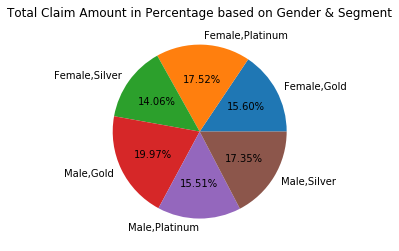

In [16]:
#Solution 11
claim_amount_gender_segment=insurance_data.copy()
claim_amount_gender_segment=claim_amount_gender_segment.groupby(by=["gender","Segment"])[["claim_amount"]].sum().add_prefix("total_")
claim_amount_gender_segment
labels=["Female,Gold","Female,Platinum","Female,Silver","Male,Gold","Male,Platinum","Male,Silver"]
plt.pie(claim_amount_gender_segment,labels=labels,autopct='%1.2f%%')
plt.title("Total Claim Amount in Percentage based on Gender & Segment")
plt.show()

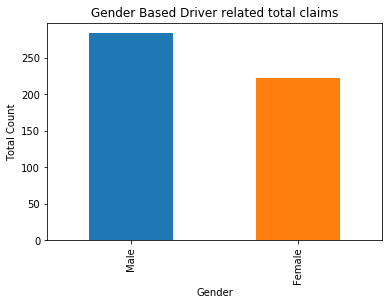

In [17]:
#Solution 12
gender_driver_issue=insurance_data.copy()
gender_driver_issue=gender_driver_issue.loc[((gender_driver_issue.incident_cause.str.contains("driver"))|
                                             (gender_driver_issue.incident_cause.str.contains("Driver"))),]
#gender_driver_issue=gender_driver_issue.groupby(by=["gender"])[["CUST_ID"]].count().add_prefix("count_")
gender_driver_issue["gender"].value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Total Count")
plt.title("Gender Based Driver related total claims")
plt.show()

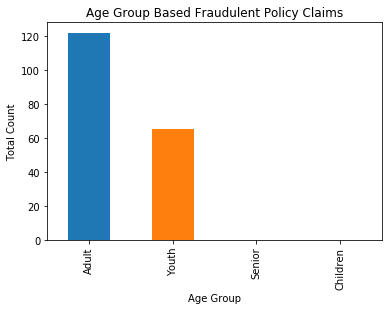

In [18]:
#Solution 13
age_group_fradulent=insurance_data.copy()
age_group_fradulent=age_group_fradulent.loc[(age_group_fradulent["fraudulent"]=="Yes"),]
age_group_fradulent["age_group"].value_counts().plot.bar()
plt.xlabel("Age Group")
plt.ylabel("Total Count")
plt.title("Age Group Based Fraudulent Policy Claims")
plt.show()

C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'monthly_identifier' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


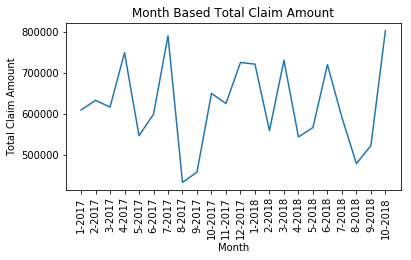

In [19]:
#Solution 14
monthly_trend_claim_amount=insurance_data.copy()
monthly_trend_claim_amount["monthly_identifier"]=monthly_trend_claim_amount.claim_date.dt.month.astype(str)+"-"+monthly_trend_claim_amount.claim_date.dt.year.astype(str)
monthly_trend_claim_amount=monthly_trend_claim_amount.groupby(by=["monthly_identifier"])[["claim_amount"]].sum().add_prefix("total_")
monthly_trend_claim_amount["monthly_identifier"]=pd.to_datetime(monthly_trend_claim_amount.index,format="%m-%Y")
monthly_trend_claim_amount=monthly_trend_claim_amount.sort_values(by=["monthly_identifier"])
monthly_trend_claim_amount.set_index(monthly_trend_claim_amount.monthly_identifier)
del monthly_trend_claim_amount["monthly_identifier"]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(monthly_trend_claim_amount)
plt.xlabel("Month") 
plt.ylabel("Total Claim Amount")
plt.title("Month Based Total Claim Amount")
plt.show()


C:\Users\intel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\intel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


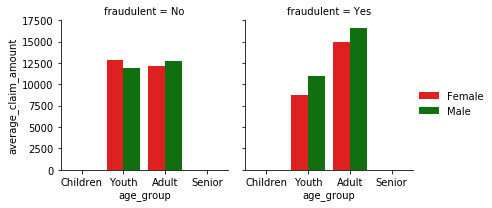

In [20]:
# Solution 15
import seaborn as sns
average_claim_amount=insurance_data.copy()
average_claim_amount=average_claim_amount.groupby(by=["gender","age_group","fraudulent"])[["claim_amount"]].mean().add_prefix("average_").reset_index()

graph = sns.FacetGrid(average_claim_amount,col="fraudulent")

graph = graph.map(sns.barplot, "age_group", "average_claim_amount", "gender",
          palette=sns.color_palette(['red','green']))
graph.add_legend()
plt.show()


# *Satistics Question Solution*

In [28]:
import scipy.stats as stats

In [29]:
#Solution 16
#As we have to find is there any similarity between amount claimed by males and females
#So parameters are amount claimed by males and amount claimed by females
amount_claim_male = insurance_data.copy()
amount_claim_male = amount_claim_male.loc[(amount_claim_male["gender"]=="Male"),["claim_amount"]].reset_index(drop=True)

amount_claim_female = insurance_data.copy()
amount_claim_female = amount_claim_female.loc[(amount_claim_female["gender"]=="Female"),["claim_amount"]].reset_index(drop=True)


In [30]:
stats.ttest_ind(amount_claim_male,amount_claim_female,equal_var=True)

Ttest_indResult(statistic=array([0.97350088]), pvalue=array([0.3305218]))

In [31]:
stats.ttest_ind(amount_claim_male,amount_claim_female,equal_var=False)

Ttest_indResult(statistic=array([0.97430057]), pvalue=array([0.33012495]))

In [33]:
# Solution 17
#As we have to find the relationship between age category and segment so the parameters taken into consideration are 
#insurance_data.age_group and insurance_data.Segment

In [35]:
crosstable = pd.crosstab(insurance_data.age_group,insurance_data.Segment,margins=True)
crosstable

Segment,Gold,Platinum,Silver,All
age_group,,,,
Youth,95,108,93,544
Adult,199,171,174,296
All,294,279,267,840


In [36]:
stats.chi2_contingency(observed=crosstable)

(148.80700342478417,
 1.382926768526795e-29,
 6,
 array([[147. , 139.5, 133.5, 420. ],
        [147. , 139.5, 133.5, 420. ],
        [294. , 279. , 267. , 840. ]]))

In [41]:
#Solution 18
#Here, current year - 2017-2018
#Parameters taken into consideration are claim amount from 2017-04-01(1 April 2017) to 2018-03-31(31 March, 2018)
claim_amount_current_year = insurance_data.copy()
fromDate = pd.to_datetime("2017-03-31",format="%Y-%m-%d")
toDate = pd.to_datetime("2018-04-01",format="%Y-%m-%d")
claim_amount_current_year=claim_amount_current_year.loc[((claim_amount_current_year["claim_date"]>fromDate)&(claim_amount_current_year["claim_date"]<toDate)),["claim_amount"]]
claim_amount_current_year.head()

,claim_amount
0,2980.0
2,3369.5
5,1440.0
6,2680.0
8,38306.5


In [42]:
stats.ttest_1samp(a=claim_amount_current_year,popmean=10000)

Ttest_1sampResult(statistic=array([5.26658962]), pvalue=array([1.95679837e-07]))

In [48]:
#Solution 19
# Parameters taken into consideration are claim amounts with different age categories
claim_amount_children=insurance_data.copy()
claim_amount_children=claim_amount_children.loc[(claim_amount_children["age_group"]=="Children"),["claim_amount"]]

claim_amount_youth=insurance_data.copy()
claim_amount_youth=claim_amount_youth.loc[(claim_amount_youth["age_group"]=="Youth"),["claim_amount"]]

claim_amount_adult=insurance_data.copy()
claim_amount_adult=claim_amount_adult.loc[(claim_amount_adult["age_group"]=="Adult"),["claim_amount"]]

claim_amount_senior=insurance_data.copy()
claim_amount_senior=claim_amount_senior.loc[(claim_amount_senior["age_group"]=="Senior"),["claim_amount"]]

,claim_amount


In [49]:
#claim_amount_children & claim_amount_senior have no data so provide other samples in f-test
stats.f_oneway(claim_amount_youth,claim_amount_adult)

F_onewayResult(statistic=array([1.93983312]), pvalue=array([0.16405605]))

In [ ]:
#Solution 20
#Parameters taken into consideration are insurance_data.total_policy_claims and insurance_data.claim_amount
# we have to find correlation coefficent because we are finding the relationship between two continous variables

In [51]:
np.corrcoef(insurance_data.total_policy_claims,insurance_data.claim_amount)[1,0]

-0.019490781428136688

In [52]:
insurance_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_group
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,40.0,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,49.0,Adult
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.500000,1.0,Yes,35.0,Adult
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,35.0,Adult
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.000000,1.0,No,33.0,Adult
5,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,33.0,Adult
6,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.000000,1.0,No,42.0,Adult
7,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,42.0,Adult
8,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,24050443,Other driver error,2017-10-04,Auto,No,Injury only,38306.500000,3.0,Yes,42.0,Adult
9,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,42.0,Adult
